In [185]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# CNN(Convolution Neural Network)
---
- 이미지, 영상 처리에 사용되는 신경망 모델
- DNN의 한 분야
- 텍스트 처리에도 사용되는 모델
- 사용되는 Layer
  - ConvXD : 이미지 형태로 특징을 추출하는 레이어
  - Polling : 특징맴에서 특징을 다시 추출하여 다운샘플링하는 레이어, 크기를 반드로 줄임.

In [186]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.fashion_mnist import load_data
import numpy as np
import matplotlib.pyplot as plt 

In [187]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

# [1] 데이터 준비 및 로딩
--- 

In [188]:
(x_train, y_train), (x_test,y_test) = load_data()

In [189]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (60000, 28, 28), y_train.shape : (60000,)
x_test.shape : (10000, 28, 28), y_test.shape : (10000,)


## [2] 데이터 전처리 및 학습형태로 변환


In [190]:
# 스케일링 => 픽셀 / 255.0
x_train = x_train/255.0
x_test = x_test/255.0

In [191]:
# Conv 레이어는 이미지의 채널정보까지 입력해야함 (,,,1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [192]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_test.shape : {x_test.shape}')

x_train.shape : (60000, 28, 28, 1)
x_test.shape : (10000, 28, 28, 1)


In [193]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split

In [194]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify= y_train, random_state=42)

In [195]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_val.shape : {x_val.shape}')
print(f'x_test.shape : {x_test.shape}')

x_train.shape : (45000, 28, 28, 1)
x_val.shape : (15000, 28, 28, 1)
x_test.shape : (10000, 28, 28, 1)


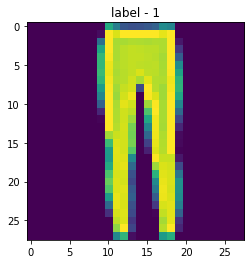

In [196]:
plt.imshow(x_val[0].reshape(28,28))
plt.title(f'label - {y_val[0]}')
plt.show()

## [3] 모델 구성 및 생성
---
- 입력 형태 : 채널정보까지 포함 3차원 (28, 28, 1)
- 출력 형태 : 0 ~ 9정수 확률값 10 개 출력
- 학습 방식 : 분류 중 다중분류
- 전반부 
  - 이미지 특징추출
    - Conv2D, MaxPoll2D
- 후반부
  - 이미지 데이터 학습
    - Flatten, Dense

## [3-1] 모델 구상

In [197]:
model = Sequential()

In [198]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(2,kernel_size = 3, padding = 'same', input_shape = (28,28,1)))

# 커널 1개, 사이즈 3 -> 3x3 +1(바이어스) => Param =10
# padding 속성 same이 아니면 노드 숫자가 줄어듬.

In [199]:
# 이미지 특징 다운샘플링 layer => MaxPool2D
model.add(MaxPool2D()) #연산은 안하기 때문에 Params = 0

In [200]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [201]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation = 'softmax'))

In [202]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 2)         20        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 2)        0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 392)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                3930      
                                                                 
Total params: 3,950
Trainable params: 3,950
Non-trainable params: 0
_________________________________________________________________


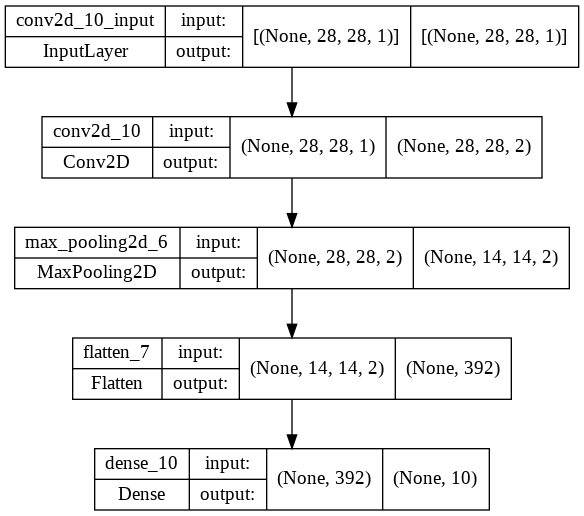

In [203]:
plot_model(model,show_shapes=True)

## [3-2] 모델 생성
---
- compile메서드
  - loss 손실 함수 => sparse_categorical_crossentropy
  - optimizer 최적화 방식 => adam
  - metrics 평가항목 => accuracy

In [204]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics = 'accuracy')

## [3-3] 모델 학습
  - fit메서드
    - 학습 데이터, 라벨
    - epochs 학습횟수
    - batch_size 학습분량
    - validation_data 검증데이터, 검증라벨
    - validation_split 학습데이터의 일부 비율 설정(ex:0.2)
    - callback
    - verbose : 학습 진행도 화면 출력 여부 설정

In [205]:
his = model.fit(x_train, y_train, epochs = 3, validation_data = (x_val,y_val), verbose =False)

# 학습 진행 결과 시각화

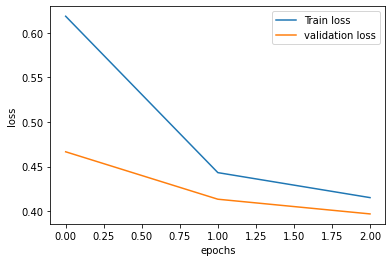

In [206]:
# loss 비교
plt.plot(his.epoch, his.history['loss'],label='Train loss')
plt.plot(his.epoch, his.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

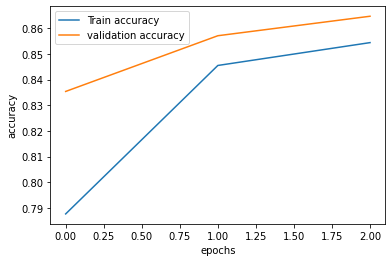

In [207]:
plt.plot(his.epoch, his.history['accuracy'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## [4] 평가
---
- evaluate()
- 테스트 데이터, 테스트 라벨

In [208]:
x_test[0].shape

(28, 28, 1)

In [209]:
pre_y = model.predict(x_test)

In [210]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.4296 - accuracy: 0.8475


[0.42962396144866943, 0.8475000262260437]

##[5]테스트